<a href="https://colab.research.google.com/github/pachoz44/CHDS29800/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lectura de archivos CSV desde Google DRIVE solo haciendo referencia al link de export... deben dar permisos al archivo

In [ ]:
# por ejemplo si uds abre un archivo para edicion deberan modificar la ultima parte del link 'edit#gid=' por esto 'export?format=csv&gid=' 
# EDICION     ->   https://docs.google.com/spreadsheets/d/1avtLRVL52Q9dWfG-H9_Dyz0s3gTT57iEYGdQk4uwWak/edit#gid=1612511270
# REFERENCIA  ->   https://docs.google.com/spreadsheets/d/1avtLRVL52Q9dWfG-H9_Dyz0s3gTT57iEYGdQk4uwWak/export?format=csv&gid=1612511270

import numpy as np
import pandas as pd
sheet_url = 'https://docs.google.com/spreadsheets/d/1qg-LOa_8wzvV4YwmRk3h9G-dZefMUNHZVxfv_nDSrLs/export?format=csv&gid=799918537'
df = pd.read_csv(sheet_url, sep=";")
df.head()

Symbol       Date   Open   High    Low  Close  Volume Currency
0  Brent Oil   4/1/2000  23.90  24.70  23.89  24.39   32509      USD
1  Brent Oil   5/1/2000  24.25  24.37  23.70  23.73   30310      USD
2  Brent Oil   6/1/2000  23.55  24.22  23.35  23.62   44662      USD
3  Brent Oil   7/1/2000  23.57  23.98  23.05  23.09   34826      USD
4  Brent Oil  10/1/2000  23.04  23.78  23.04  23.73   26388      USD

# PROYECTO DE STROKE - Franklin Zhunio

## i) Abstracto

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular es la segunda causa de muerte en todo el mundo, responsable de aproximadamente el 11% del total de muertes.
Este conjunto de datos se utiliza para **PREDECIR** si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. Cada fila de los datos proporciona información relevante sobre el paciente.

Información de atributo

1) id: identificador único

2) gender: "Masculino", "Femenino" u "Otro"

3) age: edad del paciente

4) hipertensión: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión

5 ) heart_disease: 0 si el paciente no tiene ninguna enfermedad cardíaca, 1 si el paciente tiene una enfermedad cardíaca

6) ever_married: "No" o "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Privado" o "Independiente"

8) Residence_type: "Rural" o "Urbano"

9) avg_glucose_level: nivel promedio de glucosa en sangre


10) bmi: índice de masa corporal

11) smoking_status: "anteriormente fumó", "nunca fumó", "fuma"o "Desconocido"*

12) stroke: 1 si el paciente tuvo un accidente cerebrovascular o 0 si no

*Nota: "Desconocido" en smoking_status significa que la información no está disponible para este paciente

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
df_stroke = pd.read_csv('https://raw.githubusercontent.com/pachoz44/CHDS29800/main/datasets/healthcare-dataset-stroke-data.csv')
df_stroke.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

### Exploracion de Dataset STROKE

In [ ]:
df_stroke.dtypes # observamos los tipos de datos que contiene el dataframe, donde podemos ver que los tipo object pertenecen a variables categoricas

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

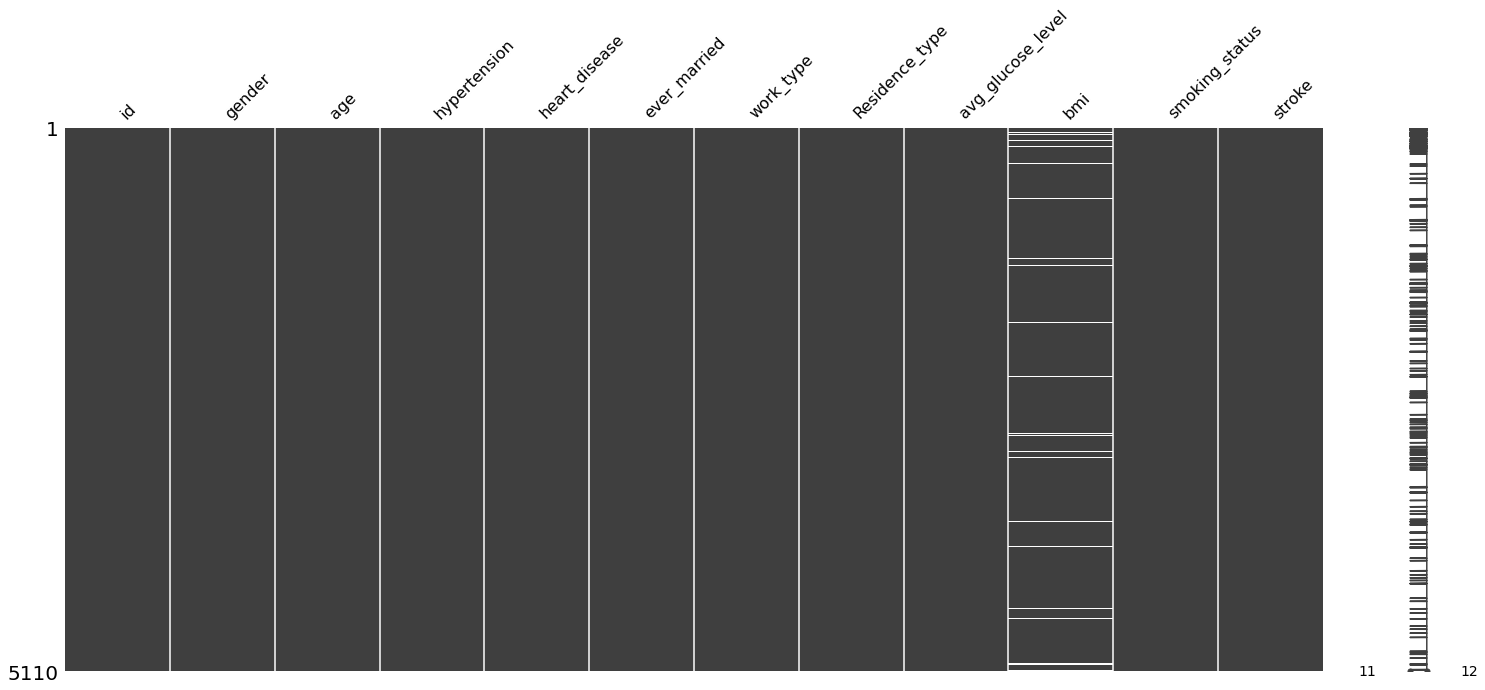

In [ ]:
import missingno as msno
msno.matrix(df_stroke)

In [ ]:
df = df_stroke.copy() # creamos una copia del dataframe original
df.shape  # obtenenmos la dimension del dataframe que es 5110 filas y 12 columnas

(5110, 12)

In [ ]:
df.describe() # comenzamos a analizar los datos de cada variable en este caso veremos el de BMI y asi definir si remplazamos los nan o imputamos con algun valor estadistico

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [ ]:
df.isna().sum() # obtengo la cantidad de NaN en cada columna y podemos apreciar que el indice de masa corporal tiene 201 nan

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df['bmi'].fillna(value=round(df['bmi'].mean(),1), inplace=True) # remplazamos los NaN por el promedio en la variable bmi
df['birth_year'] = (datetime.date.today().year - df.age).astype(int)  # creo una variable derivada de año de nacimiento usando la fecha actual menos la variable age
df['tercera_edad'] = np.where(df['age']>= 60 , 'Yes', 'No') # creamos una variable que indique si el paciente pertenece o no a la tercera edad
df['bmi_descripcion'] =  np.where(df['bmi']<18.5, 'Peso Bajo', # de acuerdo al indice de masa corporal (bmi) se puede clasificar el cuadro de obesidad que tiene el paciente
                                np.where(df['bmi']<24.9, 'Ideal',
                                np.where(df['bmi']<29.9, 'Sobre Peso',                                
                                np.where(df['bmi']<39.9,  'Obesdad Severa','Obesidad Morbida'))))
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21  28.9     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75  28.9     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  birth_year tercera_edad   bmi_descripcion  
0          1        1955          Yes    Obesdad Severa  
1          1        1961          Yes        Sobre Peso  
2          1        1942          Yes    Obesdad Severa  
3          1        1973           No    Obesdad Severa  
4          1        1943          Yes             Ideal  
...      ...         ...          ...               ...  
5105       0        1942          Yes        Sobre Peso  
5106       0        1941          Yes  Obesidad Morbida  
5107       0        1987           No    Obesdad Severa  
5108       0        1971           No        Sobre Peso  
5109       0        1978           No        Sobre Peso  

[5110 rows x 15 columns]

## ii) Preguntas//hipótesis

### A continuacion vamos a analizar datos usando distintas agrupaciones para darnos  una idea de como estan distribuidos los datos

In [ ]:
df.groupby(['stroke']).mean() # al ser STROKE mi variable target para Clasificacion procedo a agrupar por esta variable y lo hago obteniendo la media para cada variable

id        age  hypertension  heart_disease  \
stroke                                                         
0       36487.236371  41.971545      0.088871       0.047110   
1       37115.068273  67.728193      0.265060       0.188755   

        avg_glucose_level        bmi   birth_year  
stroke                                             
0              104.795513  28.825612  1980.016869  
1              132.544739  30.218876  1954.269076

podemos observar que para el valor de stroke = 1 (que es el evento de ACV) lo siguiente:


*   Tienen mayor edad
*   Mayor valor de hipertension arterial
*   Tienen  enfermedad de corazon
*   Elevado nivel de glucosa
*   Un mayor indice de masa corporal BMI



In [ ]:
df.groupby('stroke')["id"].count()  # obtenemos cuantos registros tenemos con pacientes con ACVy podemos definir un radio de casi un 5%

stroke
0    4861
1     249
Name: id, dtype: int64

In [ ]:
df.groupby(['stroke','gender', 'ever_married'])["id"].count()  # hacemos una agrupaciion de los pacientes en base a los valores de  Stroke, Genero y Si se han casado

stroke  gender  ever_married
0       Female  No               972
                Yes             1881
        Male    No               755
                Yes             1252
        Other   No                 1
1       Female  No                21
                Yes              120
        Male    No                 8
                Yes              100
Name: id, dtype: int64

In [ ]:
df.groupby(['Residence_type'])["id"].count() #obtenemos una agrupacion por el Tipo de Residencia (Rural o Urbano) 

Residence_type
Rural    2514
Urban    2596
Name: id, dtype: int64

In [ ]:
# hacemos un group by año de nacimiento y contamos la cantidad de pacientes(id) por cada año
df.groupby("birth_year")["id"].count()

birth_year
1940     56
1941     60
1942     70
1943     85
1944    102
       ... 
2017     65
2018     34
2019     46
2020    127
2021     48
Name: id, Length: 82, dtype: int64

In [ ]:
df.work_type.value_counts() # obtenemos la cantidad de pacientes en cada tipo de trabajo

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

### Hipotesis: Hay una relacion entre nivel de glucosa y que el paciente sufra un episodio de stroke

In [ ]:
df.corr() # Hipotesis: Hay una relacion entre nivel de glucosa y que el paciente sufra un episodio de stroke

id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.002977  0.325956      0.160205       0.038916   
stroke             0.006388  0.245257      0.127904       0.134914   
birth_year        -0.003654 -0.999994     -0.276488      -0.263919   

                   avg_glucose_level       bmi    stroke  birth_year  
id                          0.001092  0.002977  0.006388   -0.003654  
age                         0.238171  0.325956  0.245257   -0.999994  
hypertension                0.174474  0.160205  0.127904   -0.276488  
heart_disease               0.161857  0.038916  0.134914   -0.263919  
avg_glucose_level           1.000000  0.168767  0.131945   -0.238259  
bmi                         0.168767  1.000000  0.038971   -0.325604  
stroke                      0.131945  0.038971  1.000000   -0.245398  
birth_year                 -0.238259 -0.325604 -0.245398    1.000000

Si armamos una matriz de correlacion podemos ver que entre el nivel de glucosa y haber tenido un Stroke el indica de correlacion es de 0.13 lo cual indica que es bajo, por ende quedaria descartada la hipotesis

### Hipotesis: los pacientees que tienen enfermedad cardiaca y mayor nivel de glucosa tienen una mayor probabilidad de tener un caso de STROKE

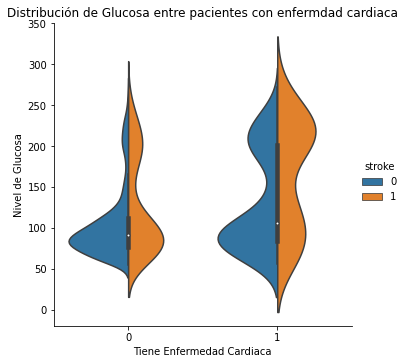

In [ ]:
ax = sns.catplot(data=df, kind='violin', x='heart_disease', y='avg_glucose_level', hue='stroke', split=True)
ax.set(xlabel='Tiene Enfermedad Cardiaca', ylabel='Nivel de Glucosa', title='Distribución de Glucosa entre pacientes con enfermdad cardiaca')

En el grafico de violin podemos ver desde otro angulo la distribucion de pacientes con STROKE en especial los que no tienen enfermedad cardiaca que tienen menor nivel de Glucosa, es decir son mas saludables mientras que en los pacientees que tienen enfermedad cardiaca notamos mayot nivel de glucosa y una mayor presencia de pacientes con STROKE

### Hipotesis: Existe una relacion de menor bmi y menor nivel de glucosa dependiendo en pacientes que trabajan con relacion a niños

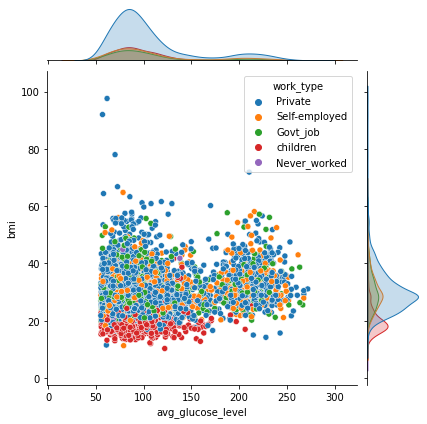

In [ ]:
sns.jointplot(x='avg_glucose_level', y='bmi',data=df, hue='work_type');

en la relacion entre bmi y nivel de glucosa podemos ver que el grupo que trabaja con niños tiene menor bmi y menor nivel de glucosa en relacion arl resto

## iii) EDA - Exploratory Data Analysis

### Visualizacion de Datos con Matplotlib

In [ ]:
serie_trabajos = df.work_type.value_counts()  # obtenemos la frecuencia de pacientes que tienen un determinado tipo de trabajo
serie_trabajos

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Text(0.5, 0, 'Tipo trabajos')

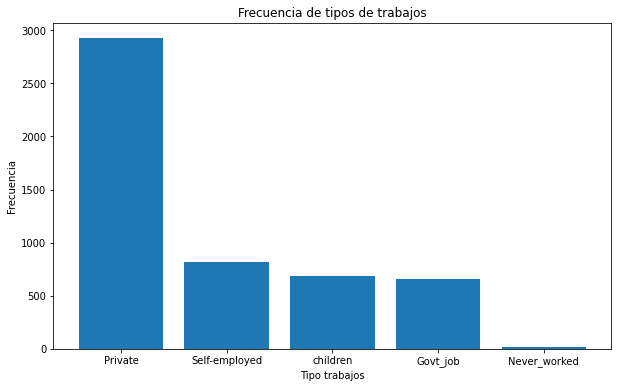

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))  # realizamos un barchar para los tipos de trabajo de los pacientes
ax.bar(serie_trabajos.index, serie_trabajos)
ax.set_title('Frecuencia de tipos de trabajos')
ax.set_ylabel('Frecuencia')
ax.set_xlabel('Tipo trabajos')

identificamos que hay casi 3000 pacientes cuyo trabajo es Privado y que representa casi un 6o% de todos los pacientes mientras que los que Nunca han trabajado es un numero muy reducido

In [ ]:
df.head()  # revisamos las variables disponibles y elegimos las variables birth_year y id pàra crear una seria de tiempo para graficar cuantos pacientes han nacido en en los años

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  28.9     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  birth_year tercera_edad bmi_descripcion  
0       1        1955          Yes  Obesdad Severa  
1       1        1961          Yes      Sobre Peso  
2       1        1942          Yes  Obesdad Severa  
3       1        1973           No  Obesdad Severa  
4       1        1943          Yes           Ideal

In [ ]:
df2 = df.groupby("birth_year")["id"].count().reset_index(name='counts')
df2

birth_year  counts
0         1940      56
1         1941      60
2         1942      70
3         1943      85
4         1944     102
..         ...     ...
77        2017      65
78        2018      34
79        2019      46
80        2020     127
81        2021      48

[82 rows x 2 columns]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   birth_year  82 non-null     int64
 1   counts      82 non-null     int64
dtypes: int64(2)
memory usage: 1.4 KB


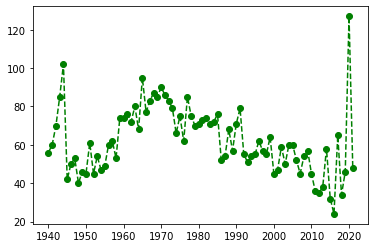

In [ ]:
fig, ax = plt.subplots()
ax.plot(df2.birth_year, df2.counts,'go--')

podemos ver que tenemos una frecuencia sostenido  de pacientes nacidos entre 1960 y 1980... asi como tenemos un poco irregular en 2020 

Text(0, 0.5, 'Glucosa')

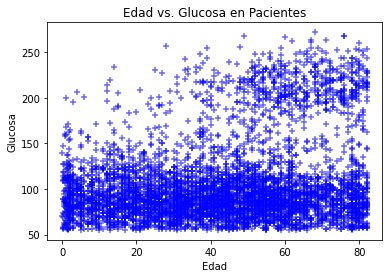

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df.age, df.avg_glucose_level, alpha=0.6,color='b',marker='+')
ax.set_title('Edad vs. Glucosa en Pacientes')
ax.set_xlabel('Edad')
ax.set_ylabel('Glucosa')

### Visualizacion de Datos con Seaborn (sns)

1) vamos a realizar graficos analizando las distrubuciones respecto a nuestra variable Clasificadora STROKE

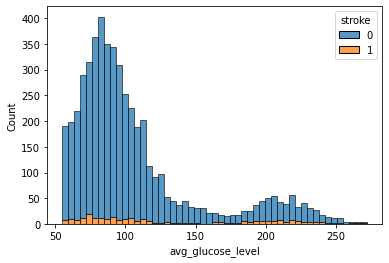

In [ ]:
sns.histplot(data=df, x="avg_glucose_level", hue="stroke", multiple="stack")

podemos verificar que hay una mayor cantidad de pacientes sin Stroke y que la mayoria tiene un nivel de glucosa entre 50 y 100

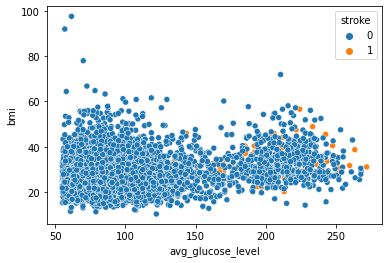

In [ ]:
stroke = df
g = sns.scatterplot(data=stroke, x="avg_glucose_level", y="bmi", hue="stroke")

Con el scarter plot podemos apreciar dos subconjuntos marcados con una separacion similar al grafico anterior con el nivel de glucosa. Pero una mayor concentracion de pacientes con STROKE=1 con el nivel de glucosa por encima de 150

2) Graficos de Analisis entre distintas variables

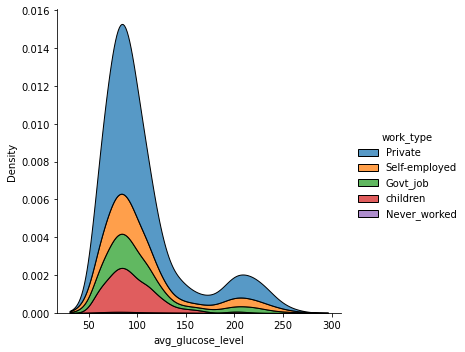

In [ ]:
sns.displot(data=df, x="avg_glucose_level", hue="work_type", multiple="stack", kind='kde')

podemos notal una mayor presencia de pacientes con un tipo de Trabajo Privado

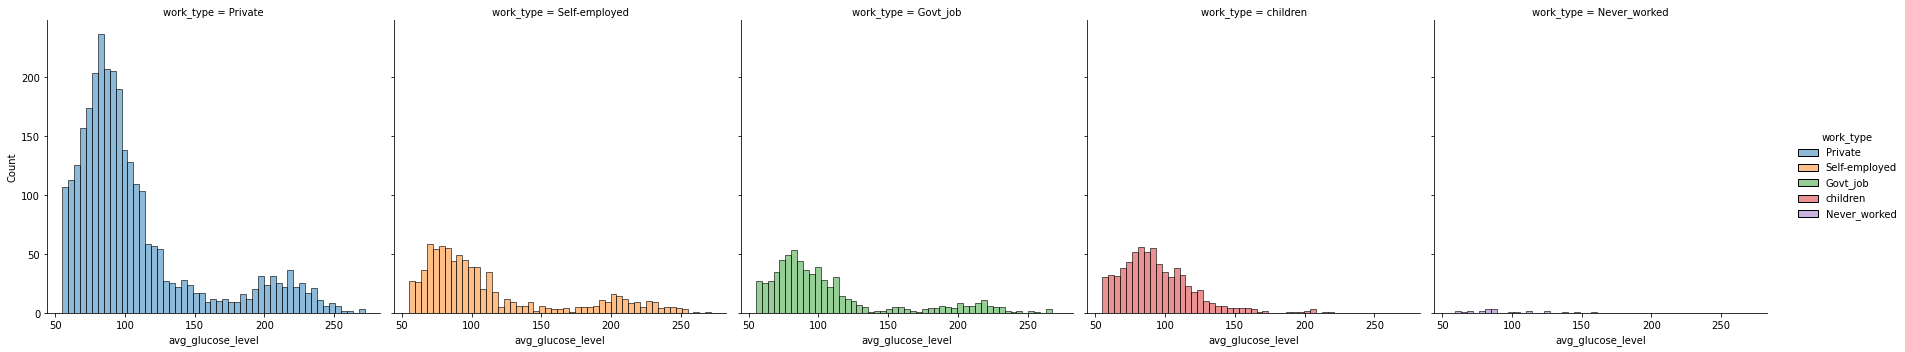

In [ ]:
sns.displot(data=df, x="avg_glucose_level", hue="work_type", col="work_type")

vemos el grafico anterior dividido en columnas y en grafico de distribucion donde apreciamos mejor que work type tiene una mayore frecuencia de 50 a 100

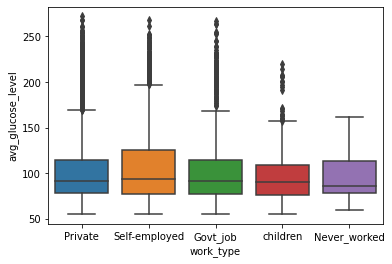

In [ ]:
ax = sns.boxplot(x="work_type", y="avg_glucose_level", data=df)

en el grafico de bloxplot apreciamos que lo empleados autonomos tienen una mayor varianza respecto al nivel de glucosa y que los que no han trabado no tienen casos extremos de glucosa

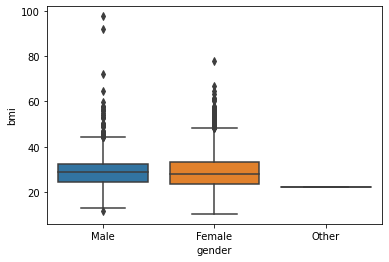

In [ ]:
sns.boxplot(x=df['gender'],y=df['bmi'])

In [ ]:
#storing categorical and continuous columns into separate lists for future purpose
con_cols=['age','avg_glucose_level','bmi']
cat_cols=[]
for i in df.columns:
    if i!='id' and i!='stroke' and i not in con_cols:
        cat_cols.append(i)
cat_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'birth_year',
 'tercera_edad',
 'bmi_descripcion']

In [ ]:
df.drop(index = df[df['gender']=='Other'].index[0] ,axis=0,inplace=True) #Only one instance of gender Other is found. Let's remove it.

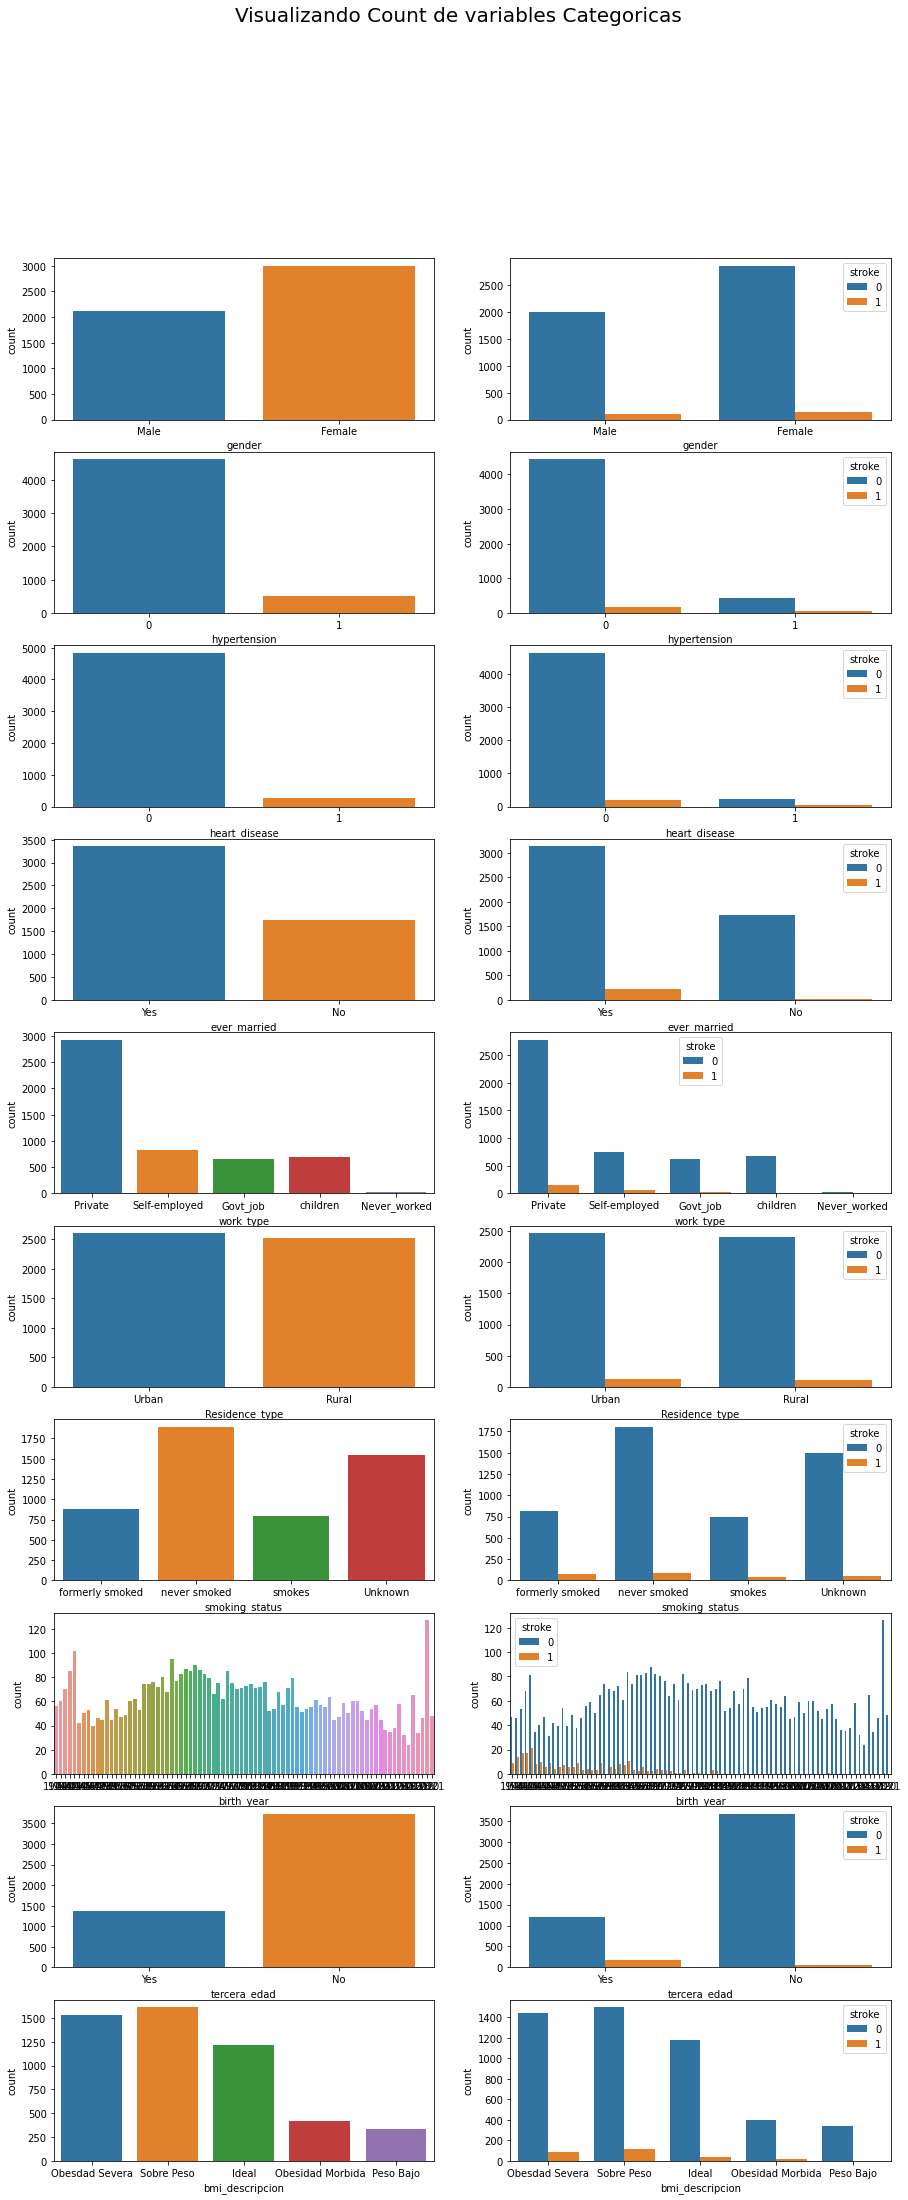

In [ ]:
fig,ax=plt.subplots(10,2,figsize=(15,35))
for index,i in enumerate(cat_cols):
    plt.suptitle("Visualizando Count de variables Categoricas",size=20)
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.countplot(data=df,x=i,ax=ax[index,1],hue='stroke')

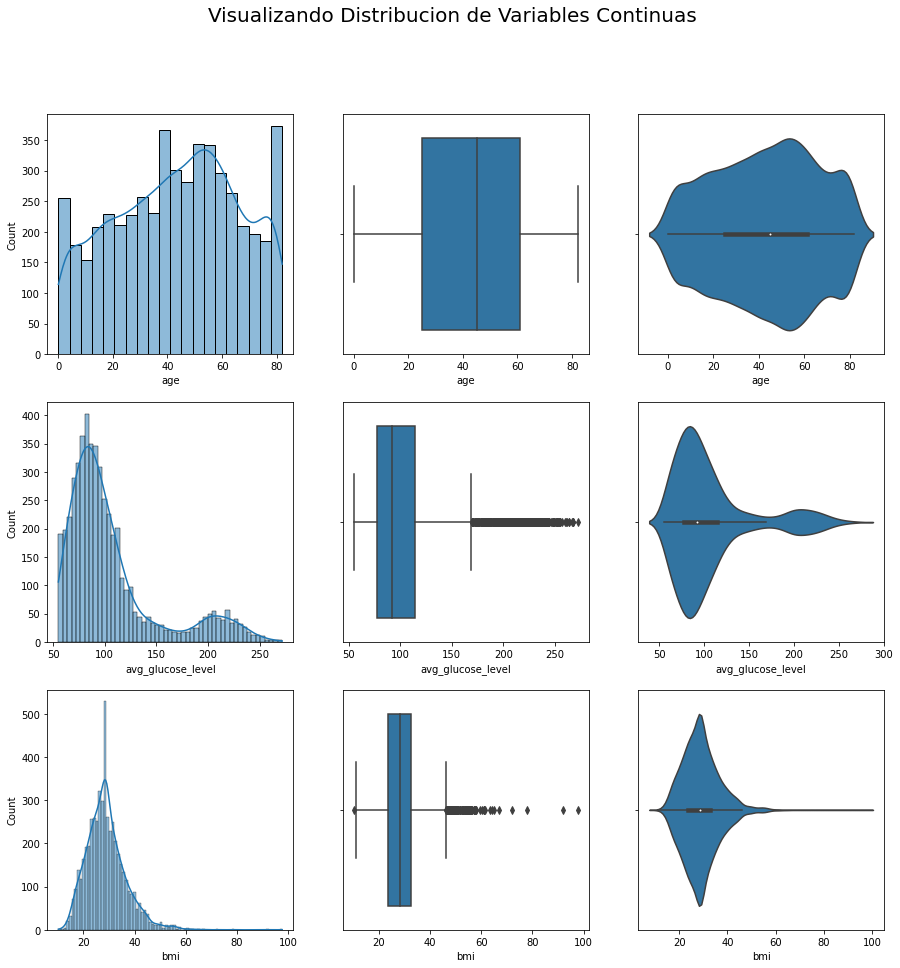

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(15,15))
for index,i in enumerate(con_cols):
    plt.suptitle("Visualizando Distribucion de Variables Continuas",size=20)
    sns.histplot(df[i],ax=ax[index,0],kde=True)
    sns.boxplot(data=df,x=i,ax=ax[index,1])
    sns.violinplot(data=df,x=i,ax=ax[index,2])

## iv) Recomendaciones con base en Insights observados

- hay que codificar las variables categoricas
- tenemos un desbalanbceo de registros de la variable target de stroke
- probar de estandarizar/escalar los datos para la modelizacion
- crear mas variables derivadas en el proceso de Datawrangling

## v) Avances

- Definicion de objetivo: Clasificacion de si es probable que un paciente sufra un accidente cerebrovascular en función de las variables de entrada 
- Contexto Comercial:
- Problema Comercial:
- Contexto Analitico:
- Exploratory Data Analisis:

## Pandas Profiling

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title='Stroke Clasification', html={'style':{'full_width':True}})

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Regresion lineal - para prediccion de variables numericas continuas

In [ ]:
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21  28.9     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75  28.9     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  birth_year tercera_edad   bmi_descripcion  
0          1        1955          Yes    Obesdad Severa  
1          1        1961          Yes        Sobre Peso  
2          1        1942          Yes    Obesdad Severa  
3          1        1973           No    Obesdad Severa  
4          1        1943          Yes             Ideal  
...      ...         ...          ...               ...  
5105       0        1942          Yes        Sobre Peso  
5106       0        1941          Yes  Obesidad Morbida  
5107       0        1987           No    Obesdad Severa  
5108       0        1971           No        Sobre Peso  
5109       0        1978           No        Sobre Peso  

[5109 rows x 15 columns]

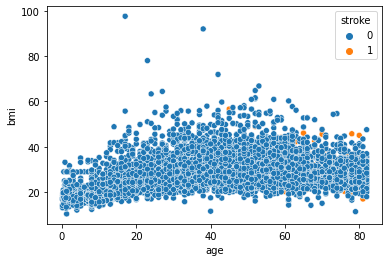

In [ ]:
stroke = df
g = sns.scatterplot(data=stroke, x="age", y="bmi", hue="stroke")

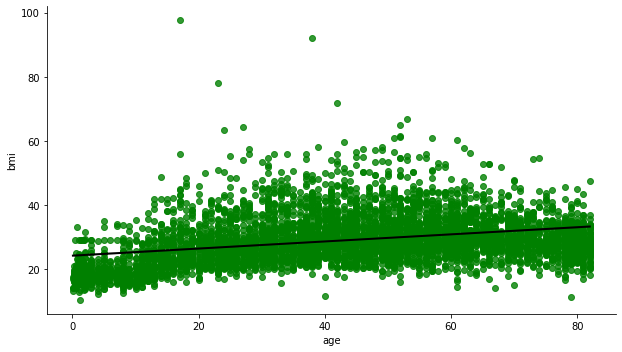

In [ ]:
sns.lmplot(x='age', y='bmi', data=df,
          scatter_kws={'color':'green', 'marker':'^'}, line_kws={'color':'black', 'lw':2}, height=5, aspect=1.75);

In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'birth_year', 'tercera_edad',
       'bmi_descripcion'],
      dtype='object')

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model1 = 'bmi~age' # modelo solo usando las variables de BMI y EDAD
lm1   = smf.ols(formula = model1, data = df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     606.8
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          1.09e-126
Time:                        05:04:48   Log-Likelihood:                -17390.
No. Observations:                5109   AIC:                         3.478e+04
Df Residuals:                    5107   BIC:                         3.480e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0991      0.220    109.683      0.0

In [ ]:
model1 = 'bmi~age + avg_glucose_level + smoking_status + heart_disease + work_type' # modelos con mas varaibles para predecir BMI
lm1   = smf.ols(formula = model1, data = df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     141.0
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          2.03e-261
Time:                        05:04:48   Log-Likelihood:                -17053.
No. Observations:                5109   AIC:                         3.413e+04
Df Residuals:                    5098   BIC:                         3.420e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

## Preprocesamiento de Datos

In [ ]:
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21  28.9     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75  28.9     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  birth_year tercera_edad   bmi_descripcion  
0          1        1955          Yes    Obesdad Severa  
1          1        1961          Yes        Sobre Peso  
2          1        1942          Yes    Obesdad Severa  
3          1        1973           No    Obesdad Severa  
4          1        1943          Yes             Ideal  
...      ...         ...          ...               ...  
5105       0        1942          Yes        Sobre Peso  
5106       0        1941          Yes  Obesidad Morbida  
5107       0        1987           No    Obesdad Severa  
5108       0        1971           No        Sobre Peso  
5109       0        1978           No        Sobre Peso  

[5109 rows x 15 columns]

In [ ]:
#  Encoding de Variables Categoricas
df_Clasificacion = pd.get_dummies(df, columns=['work_type', 'smoking_status', 'Residence_type', 'ever_married', 'gender', 'tercera_edad', 'bmi_descripcion'])
df_Clasificacion.drop(columns=['id','tercera_edad_No','gender_Female','ever_married_No'], inplace=True)  # el inplace = True es para que se guarde la modificaciojn  en el dataframe
#eliminamos las columnas contrastantes cuando fueron variable de dos valores
df_Clasificacion.head()

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  67.0             0              1             228.69  36.6       1   
1  61.0             0              0             202.21  28.9       1   
2  80.0             0              1             105.92  32.5       1   
3  49.0             0              0             171.23  34.4       1   
4  79.0             1              0             174.12  24.0       1   

   birth_year  work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0        1955                   0                       0                  1   
1        1961                   0                       0                  0   
2        1942                   0                       0                  1   
3        1973                   0                       0                  1   
4        1943                   0                       0                  0   

   ...  Residence_type_Rural  Residence_type_Urban  ever_married_Yes  \
0  ...                     0                     1                 1   
1  ...                     1                     0                 1   
2  ...                     1                     0                 1   
3  ...                     0                     1                 1   
4  ...                     1                     0                 1   

   gender_Male  tercera_edad_Yes  bmi_descripcion_Ideal  \
0            1                 1                      0   
1            0                 1                      0   
2            1                 1                      0   
3            0                 0                      0   
4            0                 1                      1   

   bmi_descripcion_Obesdad Severa  bmi_descripcion_Obesidad Morbida  \
0                               1                                 0   
1                               0                                 0   
2                               1                                 0   
3                               1                                 0   
4                               0                                 0   

   bmi_descripcion_Peso Bajo  bmi_descripcion_Sobre Peso  
0                          0                           0  
1                          0                           1  
2                          0                           0  
3                          0                           0  
4                          0                           0  

[5 rows x 26 columns]

In [ ]:
df_Clasificacion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               5109 non-null   float64
 1   hypertension                      5109 non-null   int64  
 2   heart_disease                     5109 non-null   int64  
 3   avg_glucose_level                 5109 non-null   float64
 4   bmi                               5109 non-null   float64
 5   stroke                            5109 non-null   int64  
 6   birth_year                        5109 non-null   int64  
 7   work_type_Govt_job                5109 non-null   uint8  
 8   work_type_Never_worked            5109 non-null   uint8  
 9   work_type_Private                 5109 non-null   uint8  
 10  work_type_Self-employed           5109 non-null   uint8  
 11  work_type_children                5109 non-null   uint8  
 12  smokin

## Splitting de dataset

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')  #hacemos un oversampling para balancear la cantidad de datos target de stroke
X=df_Clasificacion.drop(['stroke'],axis=1) #seleccionamos el dataset excepto la variable target STROKE
y=df_Clasificacion['stroke'] #seleccionamos solo la vatiable target STROKE
X_over, y_over = oversample.fit_resample(X, y) #realizo el oversampling del dataset para balancear los datos

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.2, random_state= 42) #hacemos el spliting de training y test
print(y_train.value_counts())
print(y_test.value_counts())

1    3892
0    3884
Name: stroke, dtype: int64
0    976
1    968
Name: stroke, dtype: int64


## Feature Selection : Wrapper Methods

### Forward selection

In [ ]:
import statsmodels.api as sm

# creamos una función para que realice este proceso.
# la función necesita tres parametros y minimamente dos, data y target
# el tercero es opcional, si no se da se toma el valor predefinido SL=0.01
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,y)

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to 

['birth_year',
 'work_type_children',
 'avg_glucose_level',
 'ever_married_Yes',
 'heart_disease',
 'hypertension']

### Backward selection

In [ ]:
# creamos una función para que realice este proceso.
# la función necesita tres parametros y minimamente dos, data y target
# el tercero es opcional, si no se da, se toma el valor predefinido SL=0.05

def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [ ]:
backward_elimination(X,y)

['hypertension',
 'heart_disease',
 'avg_glucose_level',
 'birth_year',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes',
 'Residence_type_Rural',
 'Residence_type_Urban',
 'ever_married_Yes',
 'bmi_descripcion_Ideal',
 'bmi_descripcion_Obesdad Severa',
 'bmi_descripcion_Obesidad Morbida',
 'bmi_descripcion_Peso Bajo',
 'bmi_descripcion_Sobre Peso']

### Eliminación bidireccional (stepwise)

In [ ]:
# creamos una función para que realice este proceso.
# la función necesita cuatro parametros y minimamente dos, data y target
# el tercero y cuarto es opcional, si no se da se toman los valores predefinidos

def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [ ]:
stepwise_selection(X,y)

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to 

['birth_year',
 'work_type_children',
 'avg_glucose_level',
 'ever_married_Yes',
 'heart_disease',
 'hypertension',
 'work_type_Private',
 'bmi_descripcion_Sobre Peso']

## Modelado de Machine Learning

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikitplot as skplt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report

### KNN (97.5% Accuracy)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2) # asigno a rf el algoritmo de KNeighborsClassifier
knn.fit(X_train,y_train)  # entreno el modelo knn con las variables en X_train y la variable target en Y_train
y_pred_knn = knn.predict(X_test) #obtengo los casos clasificados de X_test con el modelo 
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

Accuracy: 0.9747942386831275
ROC AUC Score: 0.9748975409836065


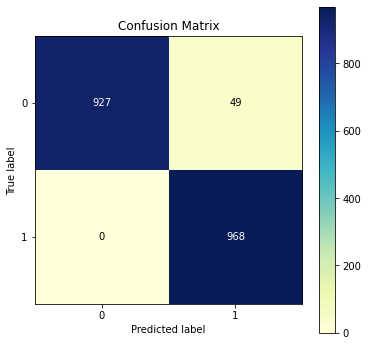

In [ ]:
# graficamos matriz de confusion con 'Y testing' y 'Y_prediccion_knn'
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, figsize=(6,6), cmap= 'YlGnBu');

print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn)) 

In [ ]:
from sklearn import metrics # vamos a medir el desempeño
print(metrics.classification_report(y_test, y_pred_knn)) #obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       976
           1       0.95      1.00      0.98       968

    accuracy                           0.97      1944
   macro avg       0.98      0.97      0.97      1944
weighted avg       0.98      0.97      0.97      1944



### Random Forest (99.2% Accuracy)

Accuracy: 0.9933127572016461
ROC AUC Score: 1.0


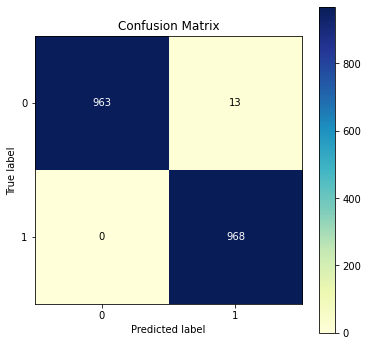

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100) # asigno a rf el algoritmo de RandomForestClassifier
rf.fit(X_train,y_train)  # entreno el modelo rf con las variables en X_train y la variable target en Y_train
y_pred_rf = rf.predict(X_test) #obtengo los casos clasificados de X_test con el modelo 
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_rf))

In [ ]:
from sklearn import metrics # vamos a medir el desempeño
print(metrics.classification_report(y_test, y_pred_rf)) #obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       976
           1       0.99      1.00      0.99       968

    accuracy                           0.99      1944
   macro avg       0.99      0.99      0.99      1944
weighted avg       0.99      0.99      0.99      1944



### Decision Tree (77.1% Accuracy)

Accuracy: 0.7813786008230452
ROC AUC Score: 0.8397241439168135


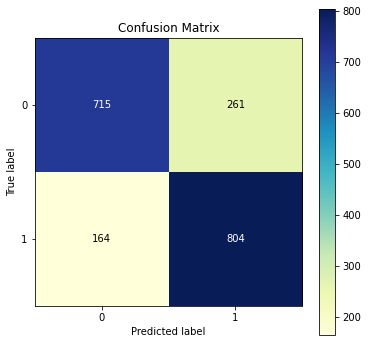

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3) # creamos el modelo dtc con el algoritmo de DecisionTreeClassifier
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test) #obtengo los casos clasificados de X_test con el modelo 
y_pred_prob_dtc = dtc.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_dtc, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_dtc))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_dtc))

In [ ]:
from sklearn import metrics # vamos a medir el desempeño
print(metrics.classification_report(y_test, y_pred_dtc)) #obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       976
           1       0.75      0.83      0.79       968

    accuracy                           0.78      1944
   macro avg       0.78      0.78      0.78      1944
weighted avg       0.78      0.78      0.78      1944



In [ ]:
feature_names = X_test.columns # obtenemos el nombre de las variables que estan en el dataset de training
feature_names

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'birth_year', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'Residence_type_Rural', 'Residence_type_Urban', 'ever_married_Yes',
       'gender_Male', 'tercera_edad_Yes', 'bmi_descripcion_Ideal',
       'bmi_descripcion_Obesdad Severa', 'bmi_descripcion_Obesidad Morbida',
       'bmi_descripcion_Peso Bajo', 'bmi_descripcion_Sobre Peso'],
      dtype='object')

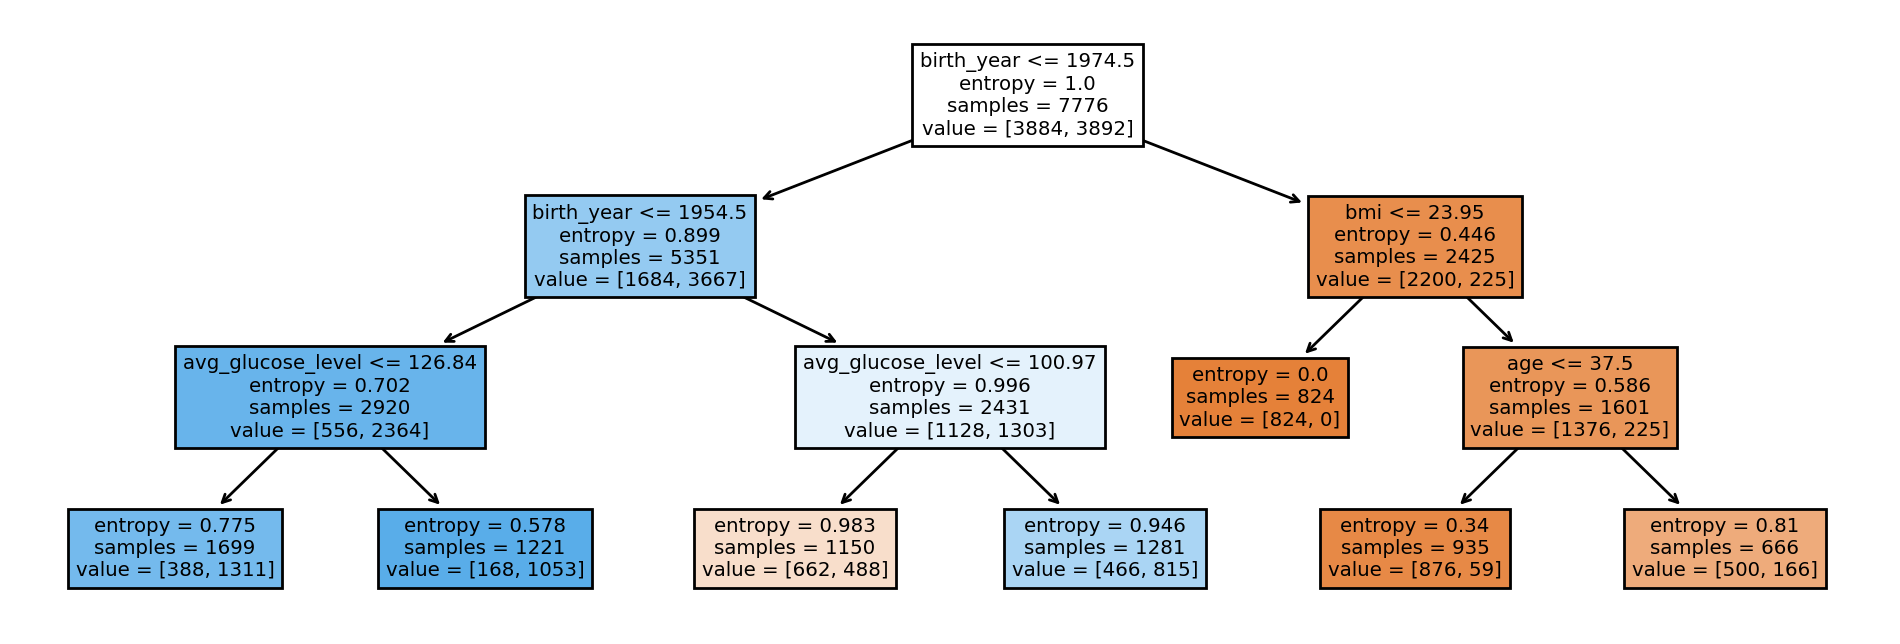

In [ ]:
plt.figure(figsize=(12, 4), dpi=200)
plot_tree(dtc, feature_names=feature_names, filled=True) #graficamos el arbol del modelo dtc con los feature names obtenidos
plt.show()

In [ ]:
pip install catboost

Accuracy: 0.9609053497942387
ROC AUC Score: 0.9971241616989566


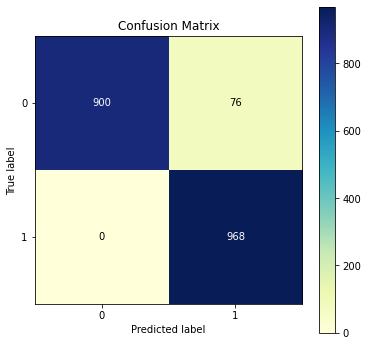

In [ ]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(verbose= 0)
cb.fit(X_train,y_train)
y_pred_cb = cb.predict(X_test)
y_pred_prob_cb = cb.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_cb, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_cb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_cb))

In [ ]:
from sklearn import metrics # vamos a medir el desempeño
print(metrics.classification_report(y_test, y_pred_cb)) #obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       976
           1       0.93      1.00      0.96       968

    accuracy                           0.96      1944
   macro avg       0.96      0.96      0.96      1944
weighted avg       0.96      0.96      0.96      1944



## XGBoost 

Accuracy: 0.8492798353909465
ROC AUC Score: 0.9202365025064354


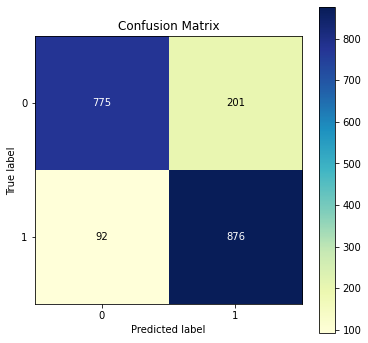

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_xgb, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

In [ ]:
from sklearn import metrics # vamos a medir el desempeño
print(metrics.classification_report(y_test, y_pred_xgb)) #obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       976
           1       0.81      0.90      0.86       968

    accuracy                           0.85      1944
   macro avg       0.85      0.85      0.85      1944
weighted avg       0.85      0.85      0.85      1944



## Explicacion de Modelos

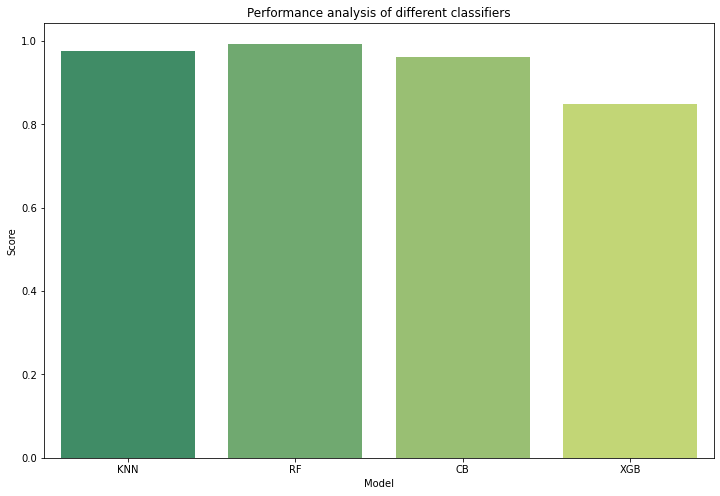

In [ ]:
Performance = pd.DataFrame(
    data = {
        'Model': ['KNN', 'RF','CB', 'XGB'], 
        'Score': [accuracy_score(y_test, y_pred_knn),
                  #accuracy_score(y_test, y_pred_svm), 
                  accuracy_score(y_test, y_pred_rf), 
                  accuracy_score(y_test, y_pred_cb), 
                  accuracy_score(y_test, y_pred_xgb)]
    }
)

plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="Score", data= Performance, palette="summer")
plt.title('Performance analysis of different classifiers')
plt.show()

In [ ]:
def feat_importance(m, df):
    return pd.DataFrame({'Feature':df.columns, 'Importance':m.feature_importances_}).sort_values('Importance', ascending=False)

In [ ]:
fi = feat_importance(cb, X)
fi.head(5)

Feature  Importance
3             avg_glucose_level   21.621805
4                           bmi   20.767129
0                           age   13.808751
5                    birth_year   13.066720
13  smoking_status_never smoked    3.989266

In [ ]:
pip install shap

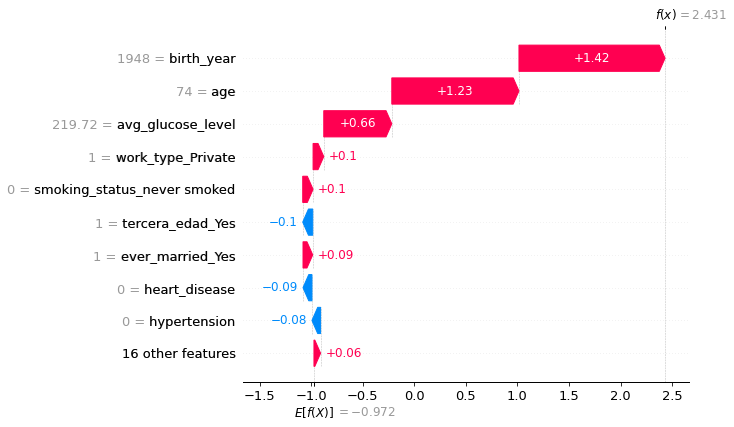

In [ ]:
import shap
explainer = shap.Explainer(cb)
shap_values = explainer(X_train)
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

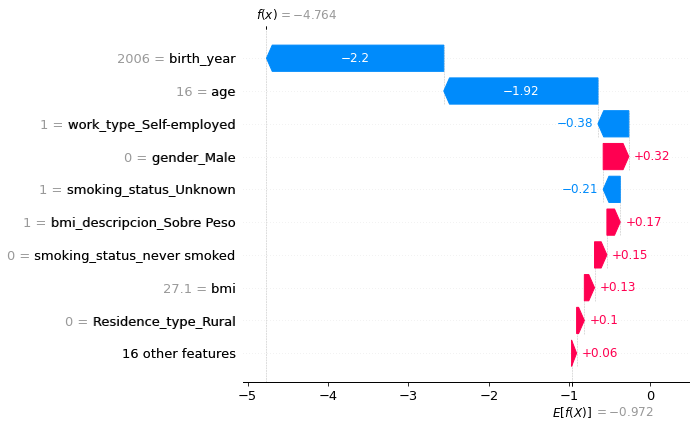

In [ ]:
# visualize the second prediction's explanation
shap.plots.waterfall(shap_values[1])